In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df=pd.read_csv(r"C:\Users\Vivek Raj\Downloads\Kaggle datasets\travel_insurance.csv")

In [118]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [119]:
df.shape

(63326, 11)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


45107 are null values in gender column

In [121]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


Here minimum value for duration is Negative, This is due to difference in time zone.

In [122]:
np.where(df['Duration']<0)

(array([14943, 52587, 52588, 56668, 59528], dtype=int64),)

In [123]:
df[df['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
14943,JZI,Airlines,Online,Basic Plan,No,-2,BANGLADESH,22.0,7.7,M,118
52587,JZI,Airlines,Online,Basic Plan,No,-1,MALAYSIA,18.0,6.3,NaN,118
52588,JZI,Airlines,Online,Basic Plan,No,-1,BRUNEI DARUSSALAM,18.0,6.3,NaN,118
56668,JZI,Airlines,Online,Basic Plan,No,-1,INDONESIA,18.0,6.3,NaN,118
59528,JZI,Airlines,Online,Basic Plan,No,-1,CHINA,22.0,7.7,NaN,118


In [124]:
df=df.drop(df[df['Duration']<0].index)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63321 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63321 non-null  object 
 1   Agency Type           63321 non-null  object 
 2   Distribution Channel  63321 non-null  object 
 3   Product Name          63321 non-null  object 
 4   Claim                 63321 non-null  object 
 5   Duration              63321 non-null  int64  
 6   Destination           63321 non-null  object 
 7   Net Sales             63321 non-null  float64
 8   Commision (in value)  63321 non-null  float64
 9   Gender                18218 non-null  object 
 10  Age                   63321 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.8+ MB


In [126]:
df[df['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age


In [127]:
## In the gender column most most value is NaN SO we can just drop the gender column
df=df.drop(columns="Gender")

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63321 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63321 non-null  object 
 1   Agency Type           63321 non-null  object 
 2   Distribution Channel  63321 non-null  object 
 3   Product Name          63321 non-null  object 
 4   Claim                 63321 non-null  object 
 5   Duration              63321 non-null  int64  
 6   Destination           63321 non-null  object 
 7   Net Sales             63321 non-null  float64
 8   Commision (in value)  63321 non-null  float64
 9   Age                   63321 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 5.3+ MB


## Monovariate Analysis

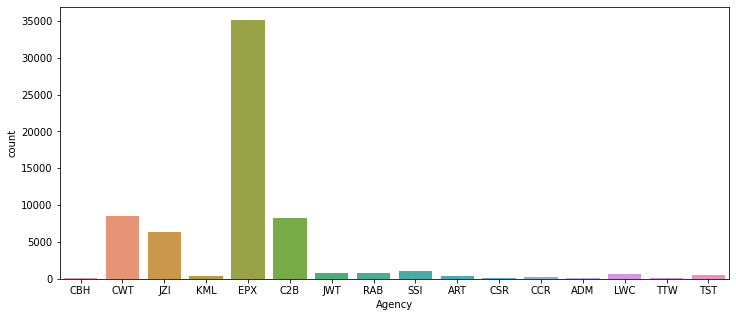

In [129]:
plt.figure(figsize=(12,5))
sns.countplot(x=df.Agency)
plt.show()

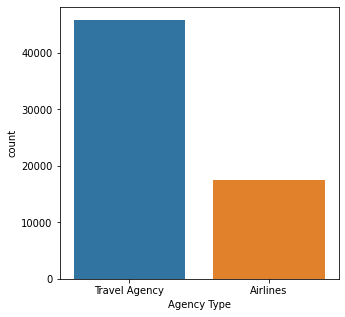

In [130]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Agency Type'])
plt.show()

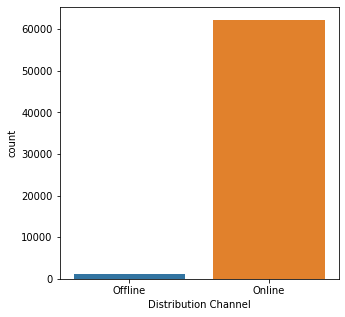

In [131]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Distribution Channel'])
plt.show()

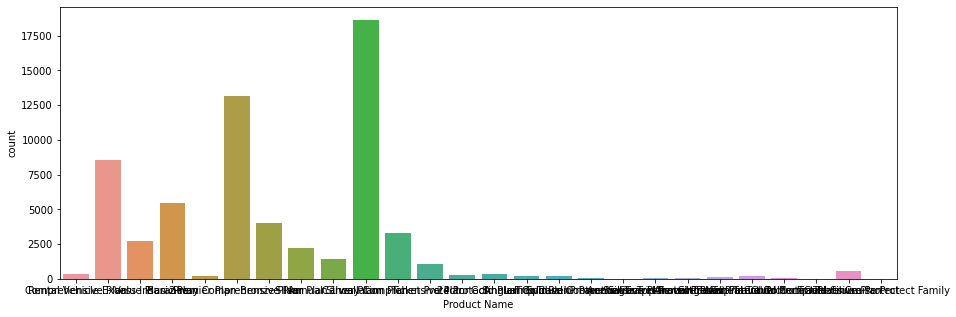

In [132]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Product Name'])

plt.show()

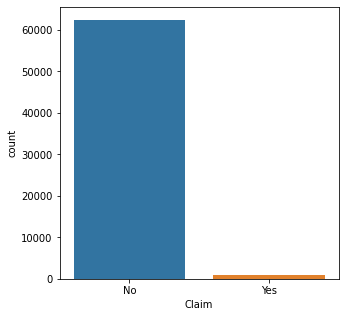

In [133]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Claim'])
plt.show()

Here we can clearly see that is unbalanced dataset

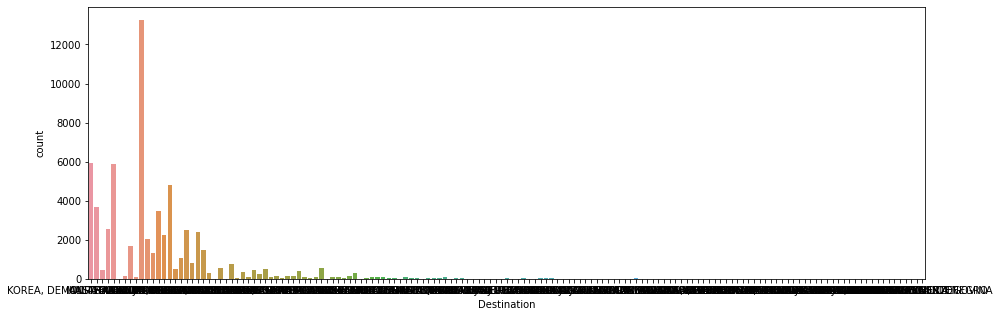

In [134]:
plt.figure(figsize=(15,5))
sns.countplot(x=df.Destination)
plt.show()

c:\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


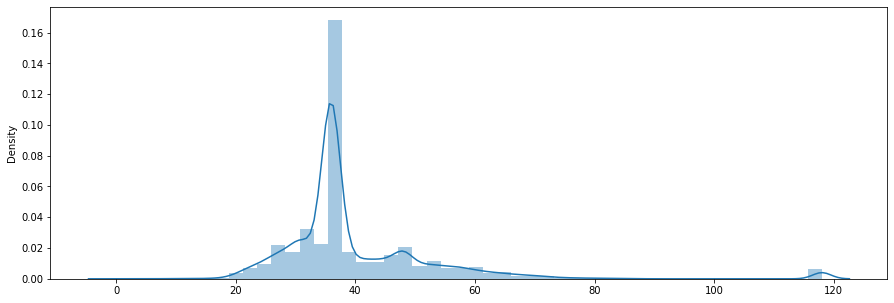

In [135]:
plt.figure(figsize=(15,5))
sns.distplot(x=df.Age)
plt.show()

c:\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


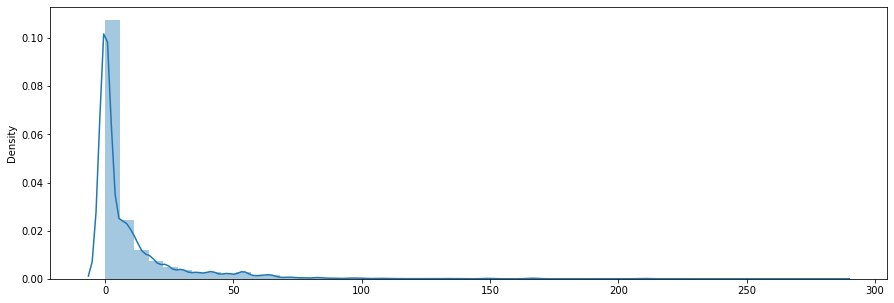

In [136]:
plt.figure(figsize=(15,5))
sns.distplot(x=df["Commision (in value)"])
plt.show()

c:\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


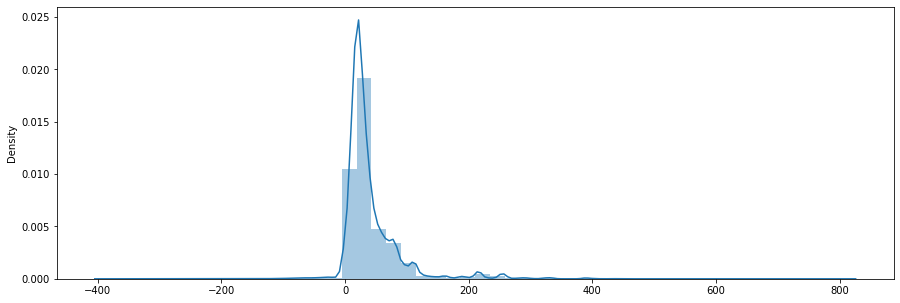

In [137]:
plt.figure(figsize=(15,5))
sns.distplot(x=df["Net Sales"])
plt.show()

c:\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


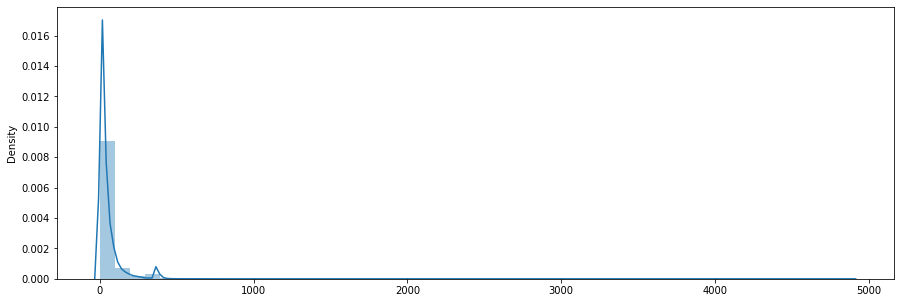

In [138]:
plt.figure(figsize=(15,5))
sns.distplot(x=df["Duration"])
plt.show()

sns.pairplot(df,hue="Claim")

## Bivariate Analysis

## 1.Agency Type

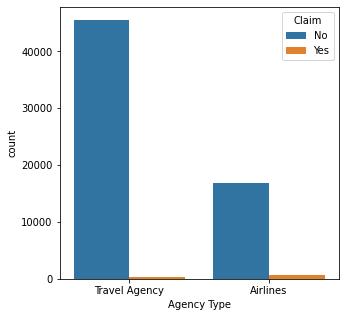

In [139]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Agency Type'],hue=df.Claim)
plt.show()

In [140]:
df.pivot_table(values="Age",index="Agency Type",columns="Claim",aggfunc="count")

Claim,No,Yes
Agency Type,,
Airlines,16861,591
Travel Agency,45533,336


In [141]:
meanAgencyType=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Agency Type",aggfunc="mean")
medianAgencyType=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Agency Type",aggfunc="median")
meanAgencyType.merge(medianAgencyType,how="inner",on="Agency Type")

,Age_x,Commision (in value)_x,Duration_x,Net Sales_x,Age_y,Commision (in value)_y,Duration_y,Net Sales_y
Agency Type,,,,,,,,
Airlines,44.981836,15.528884,67.748739,53.025340,41,9.1,20,27.0
Travel Agency,38.054590,7.634419,42.309795,36.015604,36,0.0,23,26.0


## 2.Agency

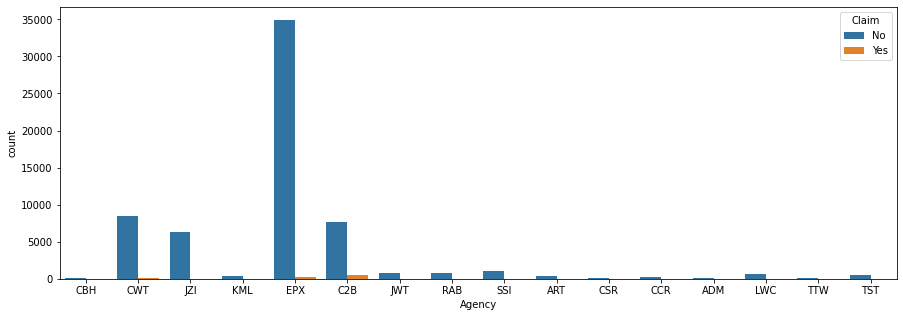

In [142]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Agency'],hue=df.Claim)
plt.show()

In [143]:
df.pivot_table(values="Age",index="Agency",columns="Claim",aggfunc="count").sort_values(['Yes'],ascending=False)

Claim,No,Yes
Agency,,
C2B,7720.0,547.0
EPX,34924.0,195.0
CWT,8494.0,86.0
LWC,653.0,36.0
JZI,6293.0,31.0
KML,384.0,8.0
SSI,1049.0,7.0
JWT,745.0,4.0
TTW,94.0,4.0


In [144]:
meanAgency_Net_Sales=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Agency",aggfunc="mean")
# meanAgency_Net_Sales

In [145]:
medianAgency_Net_Sales=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Agency",aggfunc="median")

In [146]:
meanAgency_Net_Sales.merge(medianAgency_Net_Sales,how="inner",on="Agency")

,Age_x,Commision (in value)_x,Duration_x,Net Sales_x,Age_y,Commision (in value)_y,Duration_y,Net Sales_y
Agency,,,,,,,,
ADM,23.804878,38.254878,54.914634,53.256098,22.0,34.390,41.5,75.00
ART,60.314199,10.553927,30.359517,28.691601,48.0,8.490,14.0,23.00
C2B,37.749244,20.533124,95.219910,78.865811,34.0,9.750,21.0,35.50
CBH,57.128713,10.030693,91.950495,27.168317,65.0,9.570,64.0,29.00
CCR,67.572165,10.313351,62.809278,30.654639,67.0,9.570,45.0,29.00
CSR,57.511628,10.824767,79.895349,32.802326,63.5,9.570,58.0,29.00
CWT,40.291841,32.380615,41.450350,43.040769,38.0,23.760,24.0,39.60
EPX,36.933740,0.000000,39.158860,32.564993,36.0,0.000,22.0,22.00
JWT,118.000000,21.640053,29.371162,53.012016,118.0,15.600,16.0,39.00


## 3.Distribution Channel

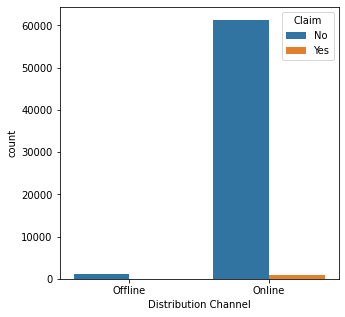

In [147]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Distribution Channel'],hue=df.Claim)
plt.show()

In [148]:
df.pivot_table(values="Age",index="Distribution Channel",columns="Claim",aggfunc="count")

Claim,No,Yes
Distribution Channel,,
Offline,1090,17
Online,61304,910


In [149]:
meanDistributionChannel_Net_Sales=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Distribution Channel",aggfunc="mean")
# meanDistributionChannel_Net_Sales

In [150]:
medianDistributionChannel_Net_Sales=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Distribution Channel",aggfunc="median")

In [151]:
meanDistributionChannel_Net_Sales.merge(meanDistributionChannel_Net_Sales,how="inner",on="Distribution Channel")

,Age_x,Commision (in value)_x,Duration_x,Net Sales_x,Age_y,Commision (in value)_y,Duration_y,Net Sales_y
Distribution Channel,,,,,,,,
Offline,56.746161,9.038103,80.495032,36.657281,56.746161,9.038103,80.495032,36.657281
Online,39.665204,9.823963,48.766371,40.775684,39.665204,9.823963,48.766371,40.775684


## 4.Product Name

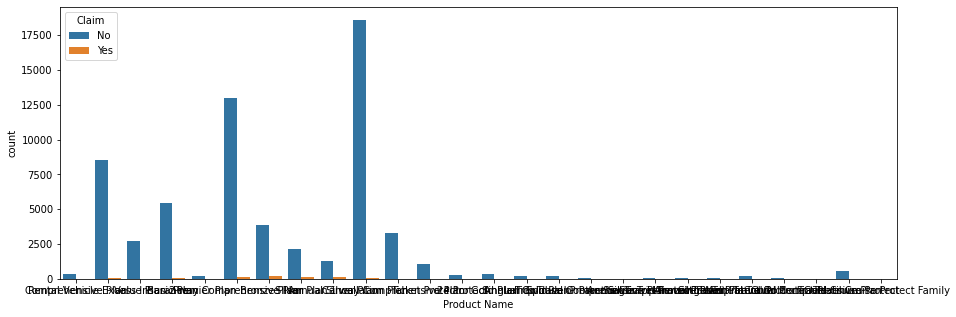

In [152]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Product Name'],hue=df.Claim)
plt.show()

In [153]:
df.pivot_table(values="Age",index="Product Name",columns="Claim",aggfunc="count").sort_values(['Yes'],ascending=False)

Claim,No,Yes
Product Name,,
Bronze Plan,3839.0,210.0
Annual Silver Plan,1266.0,157.0
2 way Comprehensive Plan,13016.0,142.0
Silver Plan,2108.0,141.0
Rental Vehicle Excess Insurance,8494.0,86.0
Cancellation Plan,18586.0,44.0
Basic Plan,5441.0,23.0
Annual Gold Plan,173.0,21.0
Value Plan,2696.0,19.0


In [154]:
meanProductName=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Product Name",aggfunc="mean")
medianProductName=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Product Name",aggfunc="median")
meanProductName.merge(medianProductName,how="inner",on="Product Name")

,Age_x,Commision (in value)_x,Duration_x,Net Sales_x,Age_y,Commision (in value)_y,Duration_y,Net Sales_y
Product Name,,,,,,,,
1 way Comprehensive Plan,36.616632,0.000000,22.637646,27.663464,36.0,0.000,10.0,20.00
2 way Comprehensive Plan,37.430689,0.000000,42.957972,42.511704,36.0,0.000,27.0,31.00
24 Protect,48.550607,8.511943,30.186235,22.772955,48.0,5.930,12.0,14.39
Annual Gold Plan,44.170103,88.920619,373.396907,336.602320,42.0,83.250,367.0,333.00
Annual Silver Plan,40.431483,56.985200,375.777231,218.851307,37.0,54.000,368.0,216.00
Annual Travel Protect Gold,38.990000,161.536200,381.070000,246.940500,37.0,166.530,371.0,256.20
Annual Travel Protect Platinum,43.113208,215.935849,378.056604,332.209434,42.0,210.210,371.0,323.40
Annual Travel Protect Silver,40.313953,136.168837,393.546512,200.596512,36.5,149.370,374.5,229.80
Basic Plan,44.371889,9.540126,33.120059,26.501647,43.0,7.700,19.0,22.00


## 5.Destination

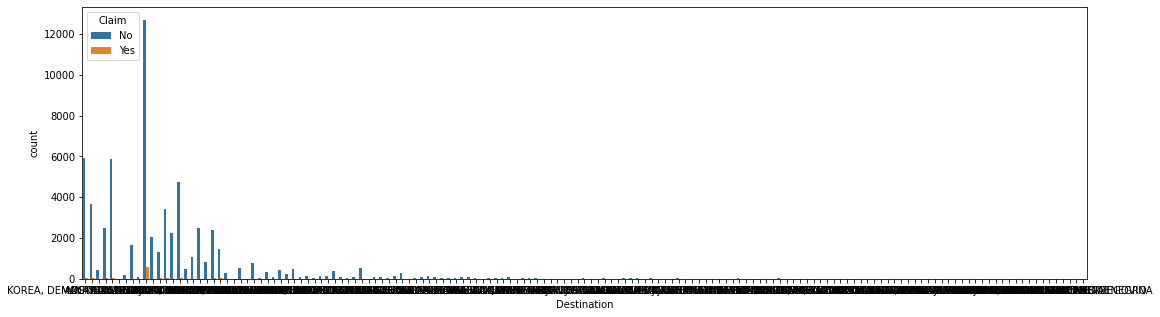

In [155]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['Destination'],hue=df.Claim)
plt.show()

In [156]:
df.pivot_table(values="Age",index="Destination",columns="Claim",aggfunc="count").sort_values(['Yes'],ascending=False)

Claim,No,Yes
Destination,,
SINGAPORE,12693.0,562.0
CHINA,4749.0,46.0
AUSTRALIA,3656.0,38.0
UNITED STATES,2493.0,37.0
THAILAND,5860.0,34.0
...,...,...
VANUATU,5.0,NaN
VENEZUELA,5.0,NaN
"VIRGIN ISLANDS, U.S.",1.0,NaN


In [157]:
meanDestination=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Destination",aggfunc="mean")
medianDestination=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Destination",aggfunc="median")
meanDestination.merge(medianDestination,how="inner",on="Destination")

,Age_x,Commision (in value)_x,Duration_x,Net Sales_x,Age_y,Commision (in value)_y,Duration_y,Net Sales_y
Destination,,,,,,,,
ALBANIA,36.000000,0.000000,28.000000,80.000000,36.0,0.00,28.0,80.0
ANGOLA,19.000000,16.000000,2.000000,0.000000,19.0,16.00,2.0,0.0
ARGENTINA,35.954545,12.948636,35.636364,47.945455,36.0,0.00,21.5,43.5
ARMENIA,36.000000,0.000000,232.000000,25.000000,36.0,0.00,232.0,25.0
AUSTRALIA,39.432052,26.066960,47.591229,47.990363,36.0,23.76,29.0,49.5
...,...,...,...,...,...,...,...,...
VENEZUELA,35.600000,0.000000,40.800000,81.400000,36.0,0.00,31.0,80.0
VIET NAM,38.721390,1.460947,25.091072,21.522025,36.0,0.00,15.0,20.0
"VIRGIN ISLANDS, U.S.",52.000000,0.000000,16.000000,80.000000,52.0,0.00,16.0,80.0


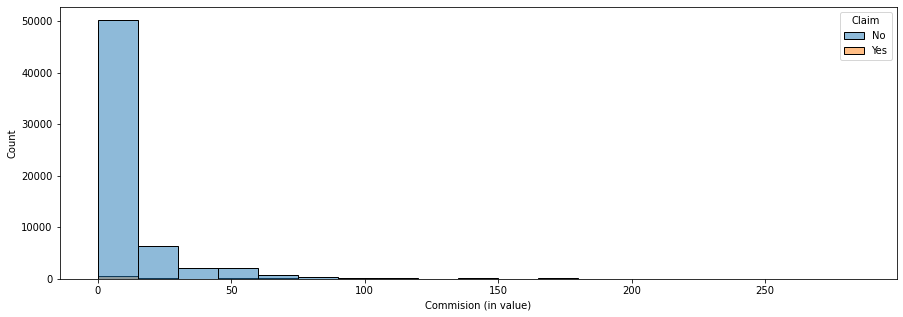

In [158]:
plt.figure(figsize=(15,5))
sns.histplot(x=df["Commision (in value)"],hue=df.Claim,binwidth=15)
plt.show()

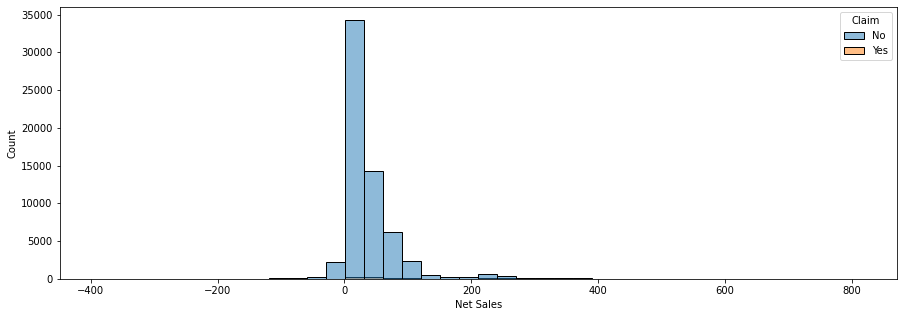

In [159]:
plt.figure(figsize=(15,5))
sns.histplot(x=df["Net Sales"],hue=df.Claim,binwidth=30)
plt.show()

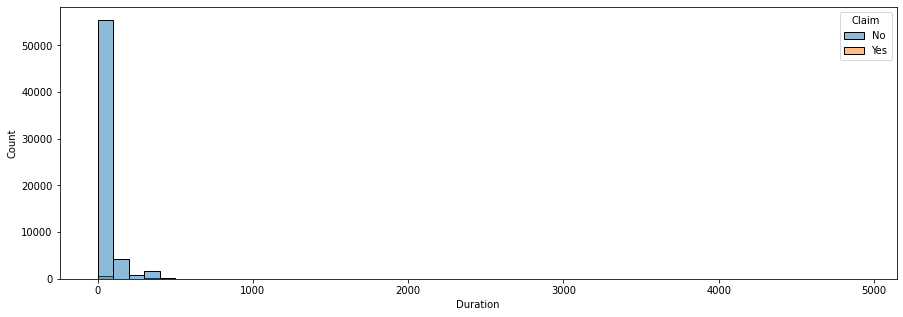

In [160]:
plt.figure(figsize=(15,5))
sns.histplot(x=df["Duration"],hue=df.Claim,binwidth=100)
plt.show()

In [161]:
df.corr()

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.429225,0.344770,0.002690
Net Sales,0.429225,1.000000,0.651315,0.037993
Commision (in value),0.344770,0.651315,1.000000,0.118559
Age,0.002690,0.037993,0.118559,1.000000


<AxesSubplot:>

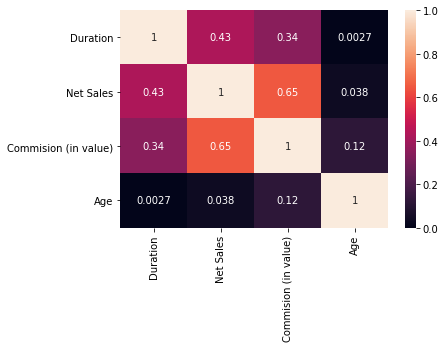

In [162]:
sns.heatmap(df.corr(),vmin=0,vmax=1,annot=True)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63321 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63321 non-null  object 
 1   Agency Type           63321 non-null  object 
 2   Distribution Channel  63321 non-null  object 
 3   Product Name          63321 non-null  object 
 4   Claim                 63321 non-null  object 
 5   Duration              63321 non-null  int64  
 6   Destination           63321 non-null  object 
 7   Net Sales             63321 non-null  float64
 8   Commision (in value)  63321 non-null  float64
 9   Age                   63321 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 7.3+ MB


In [164]:
df=pd.get_dummies(df,columns=["Agency","Agency Type","Distribution Channel","Product Name","Claim","Destination"],drop_first=True)

In [165]:
df.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,186,-29.0,9.57,81,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,-29.0,9.57,71,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,65,-49.5,29.70,32,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,60,-39.6,23.76,32,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,79,-19.8,11.88,41,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [166]:
df.shape

(63321, 195)

In [167]:
df['Claim_Yes']

0        0
1        0
2        0
3        0
4        0
        ..
63321    0
63322    0
63323    0
63324    0
63325    0
Name: Claim_Yes, Length: 63321, dtype: uint8

In [168]:
x=df.drop(columns="Claim_Yes")
y=df['Claim_Yes']

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report


In [170]:
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size = 0.1 ,random_state =0)

In [171]:
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)


c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [172]:
print("accuracy : ",accuracy_score(y_test,model_lr.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_lr.predict(x_test)))

accuracy :  0.9840517921995895
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6232
           1       0.00      0.00      0.00       101

    accuracy                           0.98      6333
   macro avg       0.49      0.50      0.50      6333
weighted avg       0.97      0.98      0.98      6333



c:\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [174]:
print("accuracy : ",accuracy_score(y_test,model_knn.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_knn.predict(x_test)))

accuracy :  0.9824727617243013
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6232
           1       0.08      0.01      0.02       101

    accuracy                           0.98      6333
   macro avg       0.53      0.50      0.50      6333
weighted avg       0.97      0.98      0.98      6333



In [175]:
model_tree=tree.DecisionTreeClassifier(max_depth=5)
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [176]:
print("accuracy : ",accuracy_score(y_test,model_tree.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_tree.predict(x_test)))

accuracy :  0.9838938891520607
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6232
           1       0.00      0.00      0.00       101

    accuracy                           0.98      6333
   macro avg       0.49      0.50      0.50      6333
weighted avg       0.97      0.98      0.98      6333



In [177]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=42)
model_rf.fit(x_train, y_train)
print("accuracy : ",accuracy_score(y_test,model_rf.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_rf.predict(x_test)))

accuracy :  0.9815253434391283
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6232
           1       0.06      0.01      0.02       101

    accuracy                           0.98      6333
   macro avg       0.52      0.50      0.50      6333
weighted avg       0.97      0.98      0.98      6333



## Resampling

## 1.Randomoversampler

In [55]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x, y)


<AxesSubplot:xlabel='Claim_Yes', ylabel='count'>

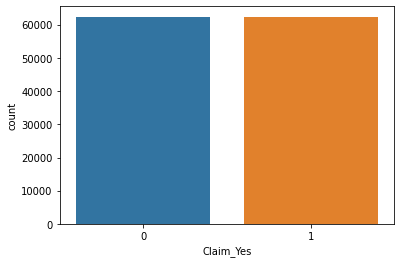

In [56]:
sns.countplot(x=y_ros)

In [57]:
x_train , x_test , y_train , y_test = train_test_split(x_ros,y_ros ,test_size = 0.2 ,random_state =42)

In [58]:
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)
print("accuracy : ",accuracy_score(y_test,model_lr.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_lr.predict(x_test)))

c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy :  0.7594358522317494
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     12578
           1       0.78      0.73      0.75     12380

    accuracy                           0.76     24958
   macro avg       0.76      0.76      0.76     24958
weighted avg       0.76      0.76      0.76     24958



In [59]:
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train,y_train)
print("accuracy : ",accuracy_score(y_test,model_knn.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_knn.predict(x_test)))

accuracy :  0.9700296498116836
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     12578
           1       0.94      1.00      0.97     12380

    accuracy                           0.97     24958
   macro avg       0.97      0.97      0.97     24958
weighted avg       0.97      0.97      0.97     24958



In [60]:
model_tree=tree.DecisionTreeClassifier(max_depth=5)
model_tree.fit(x_train,y_train)
print("accuracy : ",accuracy_score(y_test,model_tree.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_tree.predict(x_test)))

accuracy :  0.7619600929561664
              precision    recall  f1-score   support

           0       0.76      0.78      0.77     12578
           1       0.77      0.74      0.76     12380

    accuracy                           0.76     24958
   macro avg       0.76      0.76      0.76     24958
weighted avg       0.76      0.76      0.76     24958



In [61]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=42)
model_rf.fit(x_train, y_train)
print("accuracy : ",accuracy_score(y_test,model_rf.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_rf.predict(x_test)))

accuracy :  0.9937895664716724
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12578
           1       0.99      1.00      0.99     12380

    accuracy                           0.99     24958
   macro avg       0.99      0.99      0.99     24958
weighted avg       0.99      0.99      0.99     24958



In [62]:
# model_svc=SVC(kernel="linear",C=0.01)
# model_svc.fit(x_train,y_train)
# print("accuracy : ",accuracy_score(y_test,model_svc.predict(x_test)))
# print(classification_report(y_true=y_test, y_pred=model_svc.predict(x_test)))

## 2.SMOTE

In [68]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

In [69]:
x_train , x_test , y_train , y_test = train_test_split(x_smote,y_smote ,test_size = 0.2 ,random_state =42)

In [70]:
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)
print("accuracy : ",accuracy_score(y_test,model_lr.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_lr.predict(x_test)))

accuracy :  0.8605657504607741
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     12578
           1       0.81      0.93      0.87     12380

    accuracy                           0.86     24958
   macro avg       0.87      0.86      0.86     24958
weighted avg       0.87      0.86      0.86     24958



c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [74]:
confusion_matrix(y_test,model_lr.predict(x_test))

array([[ 9907,  2671],
       [  809, 11571]], dtype=int64)

In [71]:
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train,y_train)
print("accuracy : ",accuracy_score(y_test,model_knn.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_knn.predict(x_test)))

accuracy :  0.9250741245292091
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     12578
           1       0.88      0.99      0.93     12380

    accuracy                           0.93     24958
   macro avg       0.93      0.93      0.92     24958
weighted avg       0.93      0.93      0.92     24958



In [72]:
model_tree=tree.DecisionTreeClassifier(max_depth=5)
model_tree.fit(x_train,y_train)
print("accuracy : ",accuracy_score(y_test,model_tree.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_tree.predict(x_test)))

accuracy :  0.7902075486817854
              precision    recall  f1-score   support

           0       0.88      0.67      0.76     12578
           1       0.73      0.91      0.81     12380

    accuracy                           0.79     24958
   macro avg       0.81      0.79      0.79     24958
weighted avg       0.81      0.79      0.79     24958



In [73]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=42)
model_rf.fit(x_train, y_train)
print("accuracy : ",accuracy_score(y_test,model_rf.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_rf.predict(x_test)))

accuracy :  0.9799663434570077
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     12578
           1       0.97      0.99      0.98     12380

    accuracy                           0.98     24958
   macro avg       0.98      0.98      0.98     24958
weighted avg       0.98      0.98      0.98     24958



In [75]:
confusion_matrix(y_test,model_rf.predict(x_test))

array([[12225,   353],
       [  147, 12233]], dtype=int64)

## Weighting

In [80]:
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size = 0.3 ,random_state =100,stratify=y)

In [81]:
model_lr=LogisticRegression(class_weight={0: 1, 1: 98.5})
model_lr.fit(x_train,y_train)
print("accuracy : ",accuracy_score(y_test,model_lr.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_lr.predict(x_test)))

accuracy :  0.7124282781491814
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     18719
           1       0.04      0.82      0.08       278

    accuracy                           0.71     18997
   macro avg       0.52      0.77      0.45     18997
weighted avg       0.98      0.71      0.82     18997



c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [82]:
model_tree=tree.DecisionTreeClassifier(max_depth=5,class_weight={0: 1, 1: 98.5})
model_tree.fit(x_train,y_train)
print("accuracy : ",accuracy_score(y_test,model_tree.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_tree.predict(x_test)))

accuracy :  0.5630889087750698
              precision    recall  f1-score   support

           0       1.00      0.56      0.72     18719
           1       0.03      0.85      0.05       278

    accuracy                           0.56     18997
   macro avg       0.51      0.70      0.38     18997
weighted avg       0.98      0.56      0.71     18997



In [85]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=0,class_weight={0: 1, 1: 99})
model_rf.fit(x_train, y_train)
print("accuracy : ",accuracy_score(y_test,model_rf.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_rf.predict(x_test)))

accuracy :  0.9822077170079486
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18719
           1       0.12      0.03      0.05       278

    accuracy                           0.98     18997
   macro avg       0.55      0.51      0.52     18997
weighted avg       0.97      0.98      0.98     18997

